# NLP Text Preprocessing Techniques

---

This module covers: 

- Tokenization.
- Stemming 
- Lemmatization
    - Lemmatization - NLTK
    - Lemmatization - spaCy
    - Lemmatization - TFIDF tokenization parameter
    - Simple illustration of the dunder call method within a custom class
- TFIDF (includes tokenization, lemmatization and stopwords)
- Cosine Similarity

---

## Import Modules

In [1]:
# Regex
import re

# Standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
# POS for nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

# spaCy
import spacy

# DataFrameMapper
from sklearn_pandas import DataFrameMapper

# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sharmaa1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


---

## Data
- Random Text for preprocessing

In [2]:
text1 = """
This is not the best text, but it is better than good. 
It includes some words including good. 
I could include more but let's not. 
Live and let live.  
The cat jumped over the other cats.Not just another cat.
June, the girl, was born in June, the month.
Some of the worst months are worse than some of the bad years.
Happy New Year, Ashish.
Employees who employ another emplopyee are often employed in New York. This is not new.
The legislation of the legislature is a weird set of words.
"""
print(text1)

list_of_text = (text1.strip()).split(" ")

print('-'*30)
print('# of words in text : ', len((text1.strip()).split(" ")))

print('-'*30)
print('# of unique words  : ', len(set(list_of_text)))

print('-'*30)
print('# of tokens        : ', len((text1.strip()).split(" ")))


This is not the best text, but it is better than good. 
It includes some words including good. 
I could include more but let's not. 
Live and let live.  
The cat jumped over the other cats.Not just another cat.
June, the girl, was born in June, the month.
Some of the worst months are worse than some of the bad years.
Happy New Year, Ashish.
Employees who employ another emplopyee are often employed in New York. This is not new.
The legislation of the legislature is a weird set of words.

------------------------------
# of words in text :  87
------------------------------
# of unique words  :  65
------------------------------
# of tokens        :  87


### Get all words from a text using Regex

In [3]:
tmp_txt1 = "Hi New York! What's new and happening and rocking your world?"

In [4]:
regex_list_of_words = re.findall(r'\w+', tmp_txt1)

In [5]:
print(len(regex_list_of_words))

12


In [6]:
regex_list_of_words

['Hi',
 'New',
 'York',
 'What',
 's',
 'new',
 'and',
 'happening',
 'and',
 'rocking',
 'your',
 'world']

**`Insights:`**
- Punctuations (Exclamation, Apostrophe and question mark) missing if we simply only extract words
- What's --> What and s
- Duplicate words included since we are only using a simple Regex command

---

## Tokenization - NLTK

- Get all words using NLTK word tokens using nltk.tokenize
- **`word_tokenize()`**

In [7]:
nltk_word_tkn_list_of_words = word_tokenize(tmp_txt1)
print(type(nltk_word_tkn_list_of_words))

<class 'list'>


In [8]:
print(len(nltk_word_tkn_list_of_words))

14


In [9]:
nltk_word_tkn_list_of_words
# print(nltk_word_tkn_list_of_words, end='|')

['Hi',
 'New',
 'York',
 '!',
 'What',
 "'s",
 'new',
 'and',
 'happening',
 'and',
 'rocking',
 'your',
 'world',
 '?']

**`Insights:`**
- Punctuations (Exclamation, Apostrophe and question mark) included
- What's --> What and 's
- Duplicated words included

---

## Stemming - NLTK

1. Porter Stemmer
2. Snowball Stemmer (English Stemmer, Porter2 Stemmer)

In [10]:
# 1. Porter Stemmer

p_stemmer = PorterStemmer()
p_stemmer

<PorterStemmer>

In [11]:
words = ['run', 'runner', 'ran', 'runs', 'easily', 'fairly', 'fairness']

In [12]:
print(f'{"WORD":{17}} {"STEMMED WORD (Porter)":{15}}')

for word in words:
    print(f'{word:{12}} ---> {p_stemmer.stem(word):{15}}')

WORD              STEMMED WORD (Porter)
run          ---> run            
runner       ---> runner         
ran          ---> ran            
runs         ---> run            
easily       ---> easili         
fairly       ---> fairli         
fairness     ---> fair           


In [13]:
# 2. Snowball Stemmer

s_stemmer = SnowballStemmer(language='english')
s_stemmer

In [14]:
print(f'{"WORD":{17}} {"STEMMED WORD (Snowball)":{15}}')

for word in words:
    print(f'{word:{12}} ---> {s_stemmer.stem(word):{15}}')

WORD              STEMMED WORD (Snowball)
run          ---> run            
runner       ---> runner         
ran          ---> ran            
runs         ---> run            
easily       ---> easili         
fairly       ---> fair           
fairness     ---> fair           


In [15]:
words2 = ['generous', 'generously', 'generation', 'generate']

print(f'{"WORD":{17}} {"STEMMED WORD (Snowball)":{15}}')

for word2 in words2:
    print(f'{word2:{12}} ---> {s_stemmer.stem(word2):{15}}')

WORD              STEMMED WORD (Snowball)
generous     ---> generous       
generously   ---> generous       
generation   ---> generat        
generate     ---> generat        


In [16]:
words3 = ['employ', 'employs', 'employing', 'employment', 'employee', 'employees', 'employer', 'employers']

print(f'{"WORD":{17}} {"STEMMED WORD (Snowball)":{15}}')

for word3 in words3:
    print(f'{word3:{12}} ---> {s_stemmer.stem(word3):{15}}')

WORD              STEMMED WORD (Snowball)
employ       ---> employ         
employs      ---> employ         
employing    ---> employ         
employment   ---> employ         
employee     ---> employe        
employees    ---> employe        
employer     ---> employ         
employers    ---> employ         


---

## Lemmatization - NLTK


- General process for using this is to first tokenize your text (usually token will be word)
- Subsequently, use an instance of the **`WordNetLemmatizer()`** and call the lemmatize method on each word

In [17]:
lem = WordNetLemmatizer()

In [18]:
lem

<WordNetLemmatizer>

In [19]:
print(f'{"WORD":{17}} {"LEMMATIZED WORD (WordNetLemmatizer)":{15}}')

for word in words:
    print(f'{word:{12}} ---> {lem.lemmatize(word):{15}}')

WORD              LEMMATIZED WORD (WordNetLemmatizer)
run          ---> run            
runner       ---> runner         
ran          ---> ran            
runs         ---> run            
easily       ---> easily         
fairly       ---> fairly         
fairness     ---> fairness       


In [20]:
print(f'{"WORD":{17}} {"LEMMATIZED WORD (WordNetLemmatizer)":{15}}')

for word2 in words2:
    print(f'{word2:{12}} ---> {lem.lemmatize(word2):{15}}')

WORD              LEMMATIZED WORD (WordNetLemmatizer)
generous     ---> generous       
generously   ---> generously     
generation   ---> generation     
generate     ---> generate       


In [21]:
print(f'{"WORD":{17}} {"LEMMATIZED WORD (WordNetLemmatizer)":{15}}')

for word3 in words3:
    print(f'{word3:{12}} ---> {lem.lemmatize(word3):{15}}')

WORD              LEMMATIZED WORD (WordNetLemmatizer)
employ       ---> employ         
employs      ---> employ         
employing    ---> employing      
employment   ---> employment     
employee     ---> employee       
employees    ---> employee       
employer     ---> employer       
employers    ---> employer       


**Lemmatization dependent on POS of word**
- Below shows an example of why it is important to provide a POS tag of the word that will be lemmatized

In [22]:
wrd = 'content'
wrd = 'strips'
wrd = 'lead'
wrd = 'leaves'

In [23]:
lem.lemmatize(wrd)

'leaf'

In [24]:
lem.lemmatize(wrd, pos='n')

'leaf'

In [25]:
lem.lemmatize(wrd, pos='v')

'leave'

In [26]:
dir(nltk)
pos_tag(['leaves'])

[('leaves', 'NNS')]

In [27]:
leaves1 = 'No one leaves him like this'
leaves2 = 'There are leaves all over the lawn'
leaves3 = 'Dried leaves on trees'
emps1 = 'Employers can employ employees or employee for employment or employing'

print(pos_tag(word_tokenize(leaves1)))
print('-'*30)
print(pos_tag(word_tokenize(leaves2)))
print('-'*30)
print(pos_tag(word_tokenize(leaves3)))
print('-'*30)
print(pos_tag(word_tokenize(emps1)))

[('No', 'DT'), ('one', 'NN'), ('leaves', 'VBZ'), ('him', 'PRP'), ('like', 'IN'), ('this', 'DT')]
------------------------------
[('There', 'EX'), ('are', 'VBP'), ('leaves', 'VBZ'), ('all', 'DT'), ('over', 'IN'), ('the', 'DT'), ('lawn', 'NN')]
------------------------------
[('Dried', 'NNP'), ('leaves', 'VBZ'), ('on', 'IN'), ('trees', 'NNS')]
------------------------------
[('Employers', 'NNS'), ('can', 'MD'), ('employ', 'VB'), ('employees', 'NNS'), ('or', 'CC'), ('employee', 'NN'), ('for', 'IN'), ('employment', 'NN'), ('or', 'CC'), ('employing', 'VBG')]


---

### Lemmatization - spaCy

- **`lemma_`** property on token applied on a NLP pipeline document object

In [28]:
nlp = spacy.load('en_core_web_lg')
nlp

In [29]:
doc1 = nlp(leaves1)
doc1

No one leaves him like this

In [30]:
doc2 = nlp(leaves2)
doc2

There are leaves all over the lawn

In [31]:
doc3 = nlp(leaves3)
doc3

Dried leaves on trees

In [32]:
doc4 = nlp(emps1)
doc4

Employers can employ employees or employee for employment or employing

In [33]:
# Creating a function to shows lemmas for other documents

def show_lemmas(text):
    """
    Helper function to print lemmas of words(tokens) of a provided text
    I/P:
        - text(NLP document object): NLP doc object
    """

    print(f'{"Token Text":{15}} {"Token Lemma_":{15}} {"Token POS":{12}} {"Token Lemma Hash Ref":{23}} ')
    print('-'*65)
    
    for token in text:
        print(f'{token.text:{15}} {token.lemma_:{15}} {token.pos_:{12}} {token.lemma:<{23}}')

In [34]:
show_lemmas(doc1)

Token Text      Token Lemma_    Token POS    Token Lemma Hash Ref    
-----------------------------------------------------------------
No              no              DET          13055779130471031426   
one             one             NOUN         17454115351911680600   
leaves          leave           VERB         9707179535890930240    
him             he              PRON         1655312771067108281    
like            like            ADP          18194338103975822726   
this            this            DET          1995909169258310477    


In [35]:
show_lemmas(doc2)

Token Text      Token Lemma_    Token POS    Token Lemma Hash Ref    
-----------------------------------------------------------------
There           there           PRON         2112642640949226496    
are             be              AUX          10382539506755952630   
leaves          leave           NOUN         9707179535890930240    
all             all             ADV          13409319323822384369   
over            over            ADP          5456543204961066030    
the             the             DET          7425985699627899538    
lawn            lawn            NOUN         8580092763855978974    


In [36]:
show_lemmas(doc3)

Token Text      Token Lemma_    Token POS    Token Lemma Hash Ref    
-----------------------------------------------------------------
Dried           dry             VERB         4116088610979501248    
leaves          leave           VERB         9707179535890930240    
on              on              ADP          5640369432778651323    
trees           tree            NOUN         5236966400857015965    


In [37]:
show_lemmas(doc4)

Token Text      Token Lemma_    Token POS    Token Lemma Hash Ref    
-----------------------------------------------------------------
Employers       employer        NOUN         10831503532707336449   
can             can             AUX          6635067063807956629    
employ          employ          VERB         12763792191920418315   
employees       employee        NOUN         8285577505045524338    
or              or              CCONJ        3740602843040177340    
employee        employee        NOUN         8285577505045524338    
for             for             ADP          16037325823156266367   
employment      employment      NOUN         10954873364127974648   
or              or              CCONJ        3740602843040177340    
employing       employ          VERB         12763792191920418315   


In [38]:
nltk_op = [('Employers', 'NNS'), ('can', 'MD'), ('employ', 'VB'), ('employees', 'NNS'), ('or', 'CC'), ('employee', 'NN'), ('for', 'IN'), ('employment', 'NN'), ('or', 'CC'), ('employing', 'VBG')]
nltk_op

[('Employers', 'NNS'),
 ('can', 'MD'),
 ('employ', 'VB'),
 ('employees', 'NNS'),
 ('or', 'CC'),
 ('employee', 'NN'),
 ('for', 'IN'),
 ('employment', 'NN'),
 ('or', 'CC'),
 ('employing', 'VBG')]

---

## Lemmatization with TFIDF

- For using NLTK's lemmatization within TFIDF, create a dunder call method within a custom class and call this object by passing the document as a parameter
- The **`dunder call method will use an instance of the WordNetLemmatizer`** to convert each token into its lemmatized form
- Pass the above to the **`tokenizer parameter of TFIDF instance`**

In [39]:
doc5 = ['Employees can take vacation','Employee who employs employees']
doc5

['Employees can take vacation', 'Employee who employs employees']

In [40]:
random_df = pd.DataFrame({'random_text':['Employees can take vacation','Employee who employs employees']})
random_df

,random_text
0,Employees can take vacation
1,Employee who employs employees


In [41]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(token) for token in word_tokenize(doc)]

In [42]:
lem_tknzr = LemmaTokenizer()
lem_tknzr

In [43]:
tfidf_emps1 = TfidfVectorizer(tokenizer=lem_tknzr)
tfidf_emps1

TfidfVectorizer(tokenizer=<__main__.LemmaTokenizer object at 0x000001B85E110688>)

In [44]:
tfidf_emps1.fit_transform(doc5).toarray()

array([[0.53404633, 0.        , 0.37997836, 0.53404633, 0.53404633,
        0.        ],
       [0.        , 0.49844628, 0.70929727, 0.        , 0.        ,
        0.49844628]])

In [45]:
tfidf_emps1.fit_transform(random_df['random_text']).toarray()

array([[0.53404633, 0.        , 0.37997836, 0.53404633, 0.53404633,
        0.        ],
       [0.        , 0.49844628, 0.70929727, 0.        , 0.        ,
        0.49844628]])

In [46]:
tfidf_emps1_dfmapper = DataFrameMapper(
    [
        ( 'random_text', tfidf_emps1 )
    ], 
    df_out = True,
    input_df = True
)

In [47]:
tfidf_emps1_dfmapper

DataFrameMapper(df_out=True, drop_cols=[],
                features=[('random_text',
                           TfidfVectorizer(tokenizer=<__main__.LemmaTokenizer object at 0x000001B85E110688>))],
                input_df=True)

In [48]:
tfidf_emps1_dfmapper.fit_transform(random_df)

,random_text_can,random_text_employ,random_text_employee,random_text_take,random_text_vacation,random_text_who
0,0.534046,0.000000,0.379978,0.534046,0.534046,0.000000
1,0.000000,0.498446,0.709297,0.000000,0.000000,0.498446


- Below shows that effect of converting to **lower case before lemmatization**

In [49]:
[WordNetLemmatizer().lemmatize(token) for token in word_tokenize('Employees employee can take vacation')]

['Employees', 'employee', 'can', 'take', 'vacation']

In [50]:
[WordNetLemmatizer().lemmatize(token) for token in word_tokenize('employees employee can take vacation')]

['employee', 'employee', 'can', 'take', 'vacation']

---

## Simple illustration of the dunder call method within a custom class

In [51]:
class InitnCall:
    def __init__(self):
        print('Init')
    
    def __call__(self):
        print('Call')

In [52]:
my_inc = InitnCall()

Init


In [53]:
my_inc()

Call


In [54]:
class InitCallwPara:
    def __init__(self):
        print('Init')
    def __call__(self, a, b):
        print('Call with parameters: ', a ,' and ', b)
        print('Sum = ', a+b)

In [55]:
my_incwp = InitCallwPara()

Init


In [56]:
my_incwp(5,6)

Call with parameters:  5  and  6
Sum =  11


In [57]:
# __call__ let's your object act like a function

---

## TFIDF illustrating tokenization, lemmatization (NLTK), stopwords

In [58]:
random_df

,random_text
0,Employees can take vacation
1,Employee who employs employees


In [59]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(token) for token in word_tokenize(doc)]

In [60]:
lem_tknzr = LemmaTokenizer()
lem_tknzr

In [61]:
# small example of illustrating if stop words will be removed
my_stop_words = ['who']

In [62]:
tfidf_tls = TfidfVectorizer(analyzer='word', 
                            tokenizer=lem_tknzr, 
                            stop_words=my_stop_words
                           )
tfidf_tls

TfidfVectorizer(stop_words=['who'],
                tokenizer=<__main__.LemmaTokenizer object at 0x000001B85E148C48>)

In [63]:
alias = '.'
tfidf_tls_dfm = DataFrameMapper(
    [
        ( 'random_text', tfidf_tls, {'alias':alias})
    ], 
    df_out = True,
    input_df = True
)

In [64]:
dtm_df = tfidf_tls_dfm.fit_transform(random_df)
dtm_df

,._can,._employ,._employee,._take,._vacation
0,0.534046,0.000000,0.379978,0.534046,0.534046
1,0.000000,0.574962,0.818180,0.000000,0.000000


In [65]:
tfidf_tls_dfm.transformed_names_

['._can', '._employ', '._employee', '._take', '._vacation']

In [66]:
# Get the orignial words instead of the one from dfm
alias = '.'
[x.replace(alias+'_', '') for x in tfidf_tls_dfm.transformed_names_]

['can', 'employ', 'employee', 'take', 'vacation']

In [67]:
tfidf_tls_dfm.fit_transform(random_df)

,._can,._employ,._employee,._take,._vacation
0,0.534046,0.000000,0.379978,0.534046,0.534046
1,0.000000,0.574962,0.818180,0.000000,0.000000


---

## TFIDF illustrating tokenization, lemmatization (spaCy), stopwords

In [68]:
random_df

,random_text
0,Employees can take vacation
1,Employee who employs employees


In [69]:
nlp

In [70]:
class LemmaTokenizerSpacy:
    def __init__(self):
        pass
    def __call__(self, doc):
        return [token.lemma_ for token in nlp(doc)]

In [71]:
lem_tknzr_sp = LemmaTokenizerSpacy()
lem_tknzr_sp

In [72]:
tfidf_tls_sp = TfidfVectorizer(analyzer='word', 
                               tokenizer=lem_tknzr_sp, 
                               stop_words=my_stop_words
                              )
tfidf_tls_sp

TfidfVectorizer(stop_words=['who'],
                tokenizer=<__main__.LemmaTokenizerSpacy object at 0x000001B81FC43888>)

In [73]:
alias = '.'
tfidf_tls_dfm_spacy = DataFrameMapper(
    [
        ( 'random_text', tfidf_tls_sp, {'alias':alias})
    ], 
    df_out = True,
    input_df = True
)

In [74]:
dtm_df_sp = tfidf_tls_dfm_spacy.fit_transform(random_df)
dtm_df_sp

,._can,._employ,._employee,._take,._vacation
0,0.534046,0.000000,0.379978,0.534046,0.534046
1,0.000000,0.574962,0.818180,0.000000,0.000000


---

## TFIDF parameters: max_df and min_df:
- **TFIDF** method for vectorizing words / tokens
- **max_df** and **min_df**
- **vocabularies generated** with different tfidf settings for max_df and min_df

#### max_df

`max_df` is used for removing terms that appear **too frequently**, also known as "corpus-specific stop words". For example:

- `max_df = 0.50` means "ignore terms that appear in **more than 50% of the documents**".
- `max_df = 25` means "ignore terms that appear in **more than 25 documents**".

The default `max_df` is `1.0`, which means "ignore terms that appear in **more than 100% of the documents**". Thus, the default setting does not ignore any terms.

#### min_df

`min_df` is used for removing terms that appear **too infrequently**. For example:

- `min_df` = 0.01 means "ignore terms that appear in **less than 1% of the documents**".
- `min_df` = 5 means "ignore terms that appear in **less than 5 documents**".
The default `min_df` is `1`, which means "ignore terms that appear in **less than 1 document**". Thus, the default setting does not ignore any terms.

#### Helper Functions

In [75]:
def create_dtm(doc_list, vectorizer, reqd_output_format='df'):
    """
    Desc: 
        Creates a document term matrix
    Input:
        - doc_list: list of documents for which dtm is to be created
        - vectorizer: Vectorizer used for numerical representation 
          of features
        - reqd_output_format: specifies if return format is required
          as a pandas dataframe or a sparse matrix
    Output:
        - DTM: Document term matrix in DF or Sparse Matrix
    """
    dtm = vectorizer.fit_transform(doc_list)
    
    if reqd_output_format == 'spr':
        return dtm
    # else return as a pandas dataframe
    return pd.DataFrame(dtm.toarray(),
                       columns=vectorizer.get_feature_names())

In [76]:
msg1 = ["My name is Ashish Sharma",
       "Ashish likes Python programming language"]

In [77]:
tfidf_v1 = TfidfVectorizer(stop_words='english')
tfidf_v1

TfidfVectorizer(stop_words='english')

In [78]:
# max_df = 1

create_dtm(msg1, tfidf_v1)

,ashish,language,likes,programming,python,sharma
0,0.579739,0.000000,0.000000,0.000000,0.000000,0.814802
1,0.335176,0.471078,0.471078,0.471078,0.471078,0.000000


In [79]:
tfidf_v1.vocabulary_

{'ashish': 0,
 'sharma': 5,
 'likes': 2,
 'python': 4,
 'programming': 3,
 'language': 1}

In [80]:
# max_df = 0.9

tfidf_v2 = TfidfVectorizer(stop_words='english',
                          max_df=0.9)
tfidf_v2

TfidfVectorizer(max_df=0.9, stop_words='english')

In [81]:
create_dtm(msg1, tfidf_v2)

,language,likes,programming,python,sharma
0,0.0,0.0,0.0,0.0,1.0
1,0.5,0.5,0.5,0.5,0.0


In [82]:
tfidf_v2.vocabulary_

{'sharma': 4, 'likes': 1, 'python': 3, 'programming': 2, 'language': 0}

#### Get to know which words get ignored due to max_df settings

In [83]:
# Stop words due to max_df and min_df

tfidf_v2.stop_words_

{'ashish'}

In [84]:
# tfidf_v2 filters out words that are present in 90% of the documents
# tfidf_v1 does not filter out any word

# Let's see the difference b/w these 2 dictionaries to understand which
# words are present across 90% of all articles

set(tfidf_v1.vocabulary_) - set(tfidf_v2.vocabulary_)

{'ashish'}

In [85]:
# max_df = 0.5

tfidf_v3 = TfidfVectorizer(stop_words='english',
                          max_df=0.5)
tfidf_v3

TfidfVectorizer(max_df=0.5, stop_words='english')

In [86]:
create_dtm(msg1, tfidf_v3)

,language,likes,programming,python,sharma
0,0.0,0.0,0.0,0.0,1.0
1,0.5,0.5,0.5,0.5,0.0


In [87]:
tfidf_v3.vocabulary_

{'sharma': 4, 'likes': 1, 'python': 3, 'programming': 2, 'language': 0}

In [88]:
# Stop words due to max_df and min_df

tfidf_v3.stop_words_

{'ashish'}

---

## Cosine Similarity

In [89]:
# msg1_spr_arr = create_dtm_spr_arr(msg1, tfidf_v1)
msg1_spr_arr = create_dtm(msg1, tfidf_v1, 'spr')

In [90]:
type(msg1_spr_arr)

scipy.sparse.csr.csr_matrix

In [91]:
msg1_spr_arr

<2x6 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [92]:
for i in range(len(msg1)):
    print(msg1[i])

My name is Ashish Sharma
Ashish likes Python programming language


In [93]:
pd.DataFrame(msg1_spr_arr.toarray())

,0,1,2,3,4,5
0,0.579739,0.000000,0.000000,0.000000,0.000000,0.814802
1,0.335176,0.471078,0.471078,0.471078,0.471078,0.000000


#### Cosine similarity scores across documents in corpus

In [94]:
cossim = cosine_similarity(msg1_spr_arr, msg1_spr_arr)

In [95]:
cossim

array([[1.        , 0.19431434],
       [0.19431434, 1.        ]])

In [96]:
doclist = ['Doc1', 'Doc2']

In [97]:
cossim_df = pd.DataFrame(cossim, index=doclist, columns=doclist)

In [98]:
cossim_df

,Doc1,Doc2
Doc1,1.000000,0.194314
Doc2,0.194314,1.000000


#### Cosine similarity scores (visual) across documents in corpus

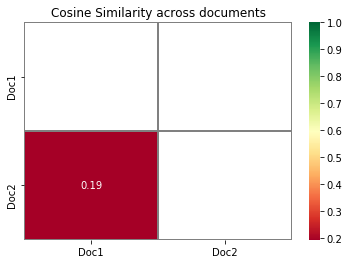

In [99]:
# plt.figure(figsize=(10,6))
mask = np.zeros_like(cossim_df)
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(data=cossim_df,
            mask=mask,
            linewidth=0.7,
            cmap='RdYlGn',
            annot=True,
            linecolor='grey')
plt.title('Cosine Similarity across documents')
plt.show()

---